✅ File loaded successfully!


/tmp/ipython-input-2049093116.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_roi.index, y=avg_roi.values, ax=axes[0, 1], palette='Greens_r')


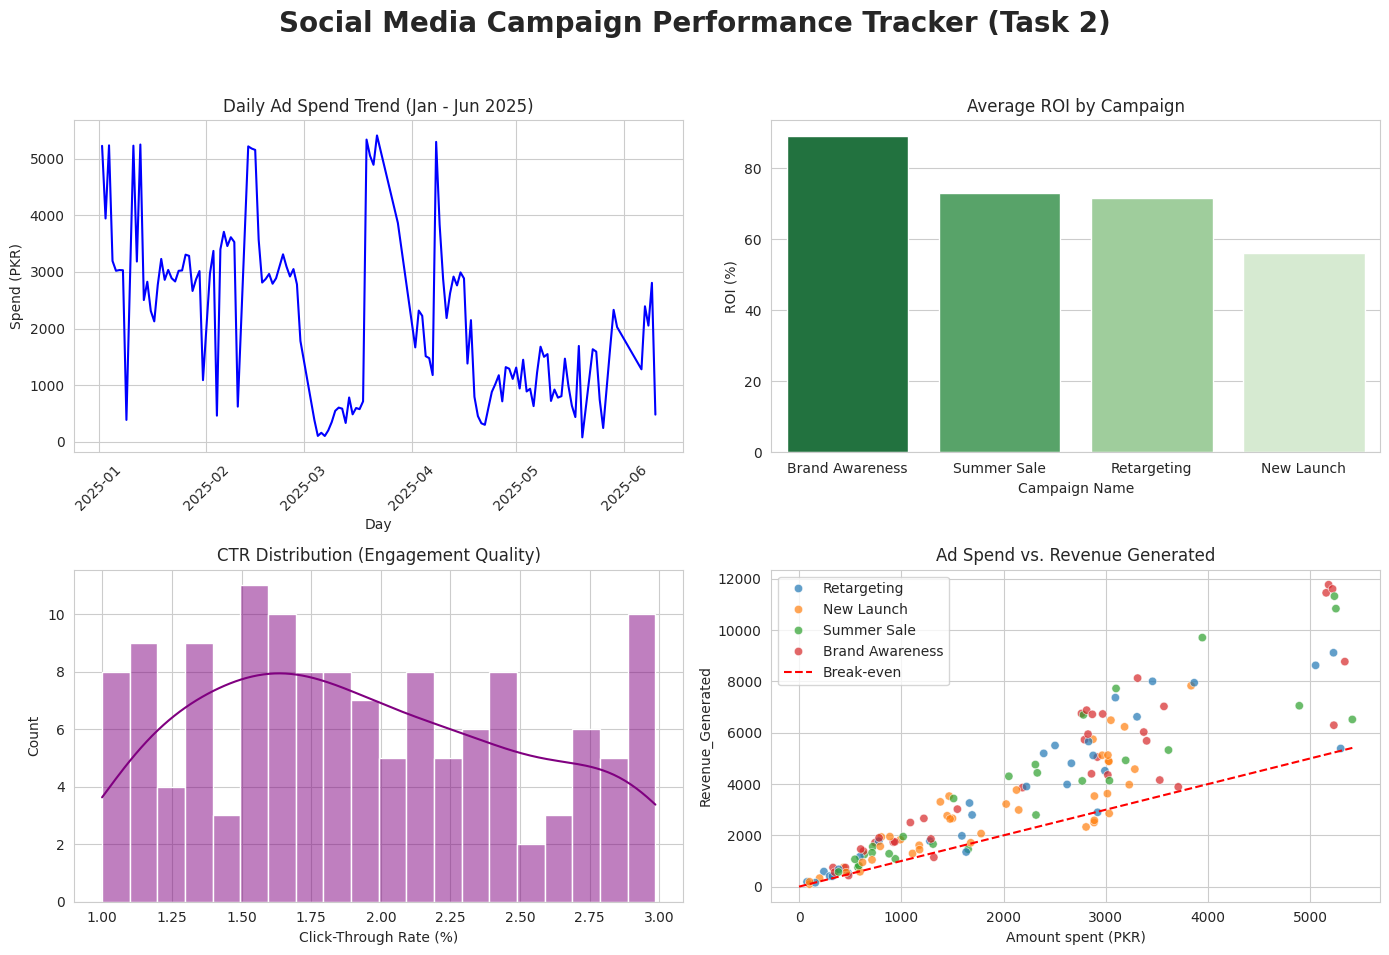


📊 Campaign Performance Summary:
                 Amount spent (PKR)      Clicks  Revenue_Generated      ROI %
Campaign Name                                                                
Brand Awareness         2436.682778  709.944444        4580.197019  89.044828
New Launch              1859.290976  543.268293        2856.374035  56.173186
Retargeting             2151.217000  648.566667        3724.633022  71.602380
Summer Sale             2275.777143  648.857143        4032.281982  72.972415


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your specific file
filename = '/content/Daily-AdSpend-report-Jan-1-2025-to-Jun-10-2025.csv'
try:
    df = pd.read_csv(filename)
    print("✅ File loaded successfully!")
except FileNotFoundError:
    # If file isn't found, generate dummy spend data for testing
    print("⚠️ File not found. Generating dummy data...")
    dates = pd.date_range(start='2025-01-01', end='2025-06-10', freq='D')
    df = pd.DataFrame({
        'Day': dates,
        'Amount spent (PKR)': np.random.uniform(500, 3000, len(dates))
    })

# 2. Data Augmentation (Creating the missing metrics)
# Since the file only has 'Spend', we will simulate Impressions, Clicks, and Revenue
# to make the analysis possible.

np.random.seed(42) # For consistent results

# Create dummy Campaigns (e.g., Awareness, Sales, Retargeting)
campaigns = ['Summer Sale', 'Brand Awareness', 'Retargeting', 'New Launch']
df['Campaign Name'] = np.random.choice(campaigns, len(df))

# Simulate Impressions (approx 100-200 impressions per 10 PKR spent)
df['Impressions'] = (df['Amount spent (PKR)'] * np.random.uniform(10, 20, len(df))).astype(int)

# Simulate Clicks (CTR between 1% and 3%)
df['Clicks'] = (df['Impressions'] * np.random.uniform(0.01, 0.03, len(df))).astype(int)

# Simulate Revenue (ROI varies: some lose money, some make 2x)
df['Revenue_Generated'] = df['Amount spent (PKR)'] * np.random.uniform(0.8, 2.5, len(df))

# 3. Calculate Key Metrics (Task Requirements)
df['CTR %'] = (df['Clicks'] / df['Impressions']) * 100
df['CPC'] = df['Amount spent (PKR)'] / df['Clicks']
df['ROI %'] = ((df['Revenue_Generated'] - df['Amount spent (PKR)']) / df['Amount spent (PKR)']) * 100

# Convert 'Day' to datetime
df['Day'] = pd.to_datetime(df['Day'])

# 4. Visualization (Dashboard)
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Social Media Campaign Performance Tracker (Task 2)', fontsize=20, weight='bold')

# Plot 1: Daily Ad Spend Trend
sns.lineplot(data=df, x='Day', y='Amount spent (PKR)', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Daily Ad Spend Trend (Jan - Jun 2025)')
axes[0, 0].set_ylabel('Spend (PKR)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: ROI by Campaign
avg_roi = df.groupby('Campaign Name')['ROI %'].mean().sort_values(ascending=False)
sns.barplot(x=avg_roi.index, y=avg_roi.values, ax=axes[0, 1], palette='Greens_r')
axes[0, 1].set_title('Average ROI by Campaign')
axes[0, 1].set_ylabel('ROI (%)')

# Plot 3: Click-Through Rate (CTR) Distribution
sns.histplot(df['CTR %'], bins=20, kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('CTR Distribution (Engagement Quality)')
axes[1, 0].set_xlabel('Click-Through Rate (%)')

# Plot 4: Spend vs. Revenue (Scatter)
sns.scatterplot(data=df, x='Amount spent (PKR)', y='Revenue_Generated', hue='Campaign Name', ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Ad Spend vs. Revenue Generated')
axes[1, 1].plot([0, df['Amount spent (PKR)'].max()], [0, df['Amount spent (PKR)'].max()], 'r--', label='Break-even') # Break-even line
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print Summary Table
print("\n📊 Campaign Performance Summary:")
summary = df.groupby('Campaign Name')[['Amount spent (PKR)', 'Clicks', 'Revenue_Generated', 'ROI %']].mean()
print(summary)